# Support Vector Machines

“Recuerde que el valor de un **clasificador** está en qué tan bien separa los datos de entrenamiento. Lo que queremos es que clasifique puntos de datos aún no vistos (conocidos como datos de prueba). Dado eso, queremos elegir una **línea que capture el patrón general en los datos de entrenamiento**, por lo que hay una buena probabilidad de que funcione bien en los datos de la prueba”.

En Data Science es fundamental: **¿cómo se define la frontera de decisión?**

Las **SVM** identifican **rectas que clasifican correctamente los datos de entrenamiento**, y eligen aquella que tiene mayor distancia -o margen- en relación a los puntos más cercanos, a los que llamamos **“vectores de soporte”**.  
Nos permiten elegir la mejor entre muchas fronteras, de modo que garantiza una mayor probabilidad de etiquetar correctamente a los datos nunca vistos

Si los datos se pueden separar por una recta (o hiperplano) se dice que los mismos resultan ser linealmente separables.

Como verás, tenemos el siguiente cuadro de situación:

1- Para datos separables linealmente, las SVM funcionan muy bien.

2- Para datos que son casi linealmente separables, se puede hacer que las SVM funcionen bien utilizando un parámetro llamado “C”.

3- Para los datos que no son linealmente separables, podemos proyectar datos en un espacio donde sea perfectamente/casi linealmente separable, lo que reduce el problema a 1 ó 2 - "truco del Kernel".  
4- Kernel y C son los **hiperparámetros**.

Lo que hacemos es “pedirle” a la SVM que haga la proyección por nosotros, ¡lo cual nos simplifica las tareas! A los encargados de hacer esas proyecciones se los conoce como Kernels.  

Las **funciones kernels** son las que les dan a las SVM su poder para separar los puntos no linealmente separables, en un espacio de mayor dimensionalidad. La dimensión de un conjunto de datos puede transformarse combinando o modificando cualquiera de ellas.

Cuando nos enfrentamos a un problema que no es linealmente separable, procedemos a probar entre los kernels: *Gaussiano, Sigmoide y Polinomial*. Si bien existe la posibilidad de crear nuestro propio kernel, en los problemas más comunes esto no es necesario.

Un Kernel es una forma de calcular el producto punto de dos vectores 𝑥 e 𝑦 en algún espacio de características (posiblemente de mayor dimensionalidad), por lo que las funciones del kernel a veces se denominan "producto punto generalizado".

Mi modelo finalmente será tan buena, de acuerdo a que tan bien me dan mis datos de entrenamiento y su respectivo accurracy.

__Nota:__ Ver **Min 21.50**
* Gaussiano (1ra opción): Hace una separación más clara de los datos (o puntos) que presentan mayor concentración.
* Polinomial (2ra opción): Se de antemano que los datos provienen de algún tipo de función matemática de una función, por ej. función exponencial (COVID-19).
* Sigmoide (3ra opción): Sirve cuando mi separación tiene 2 clases y sé que se pueden alcanzar aplicando elevando al cuadrado o al cubo como en la regresión lineal.

## 1. Social Network Ads 

En primer lugar vamos a trabajar con el dataset de Social Networks Ads, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads).

### Columnas del dataset:
* User ID: identificación de usuario.
* Gender: género.
* Age: edad.
* EstimatedSalary: salario estimado.
* Purchased: compró/no compró un producto en particular.

Ahora sí, a trabajar. En primer lugar, recomendamos hacer una pequeña exploración de datos si tienes tiempo. Luego, sigue los pasos que aquí te dejamos. Si te sientes seguro/a, hasta puedes intentar implementar un SVM sobre ese dataset sin mirar la guía que dejamos. En ese caso, te conviene hacerlo en otro notebook. ¡Inténtalo!

1. Importa las librerías necesarias y carga el dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Data\DS_Bitácora_25_Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


2. Sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary` (así podemos visualizar). Y como target a la columna `Purchased`

Ahora veamos cuantos datos de cada etiqueta tenemos, para ellos debemos ver la columna `Purchased`.
* S/ `Target`, de cada etiqueta, tenemos las Clases 0 y 1.  
* No tenemos valores nulos.

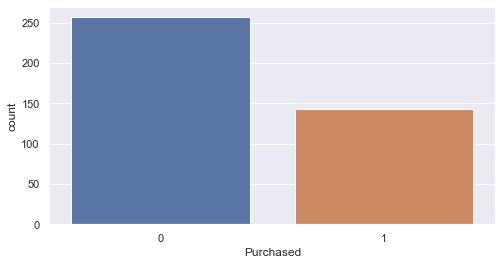

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(data['Purchased'],label="Count")
plt.show()

In [6]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [7]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


3. Separa los datos de entrenamiento de los datos de prueba.

__Nota:__ *Generalmente* PRIMERO se trabajan los datos (x ej. StandardScaler), y luego, se hace el split.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

4. Estandariza los datos (`StandardScaler`).

In [9]:
from sklearn.preprocessing import StandardScaler # Para hacer transformación con Z-Score

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

5. Entrena un SVM. Para ello, utiliza la clase `SVC` de la librería Scikit-Learn cuya documentación la puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [10]:
from sklearn.svm import SVC

SCV_model = SVC(kernel='linear', random_state=0)

6. Realiza las predicciones sobre los datos de prueba.

In [11]:
SCV_model.fit(X_train_scaler, np.ravel (y_train))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
y_pred_test = SCV_model.predict(X_test_scaler)

In [13]:
# y_pred_train = model.predict(X_train_scaler)

7. Visualiza los resultados mediante:
 
* Matriz de confusión (`confusion_matrix`)
* Reporte de clasificación (`classification_report`)
* Gráfico de fronteras de decisión (¡Busca en notebooks anteriores!)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred_test)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[61  2]
 [12 25]]


In [15]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



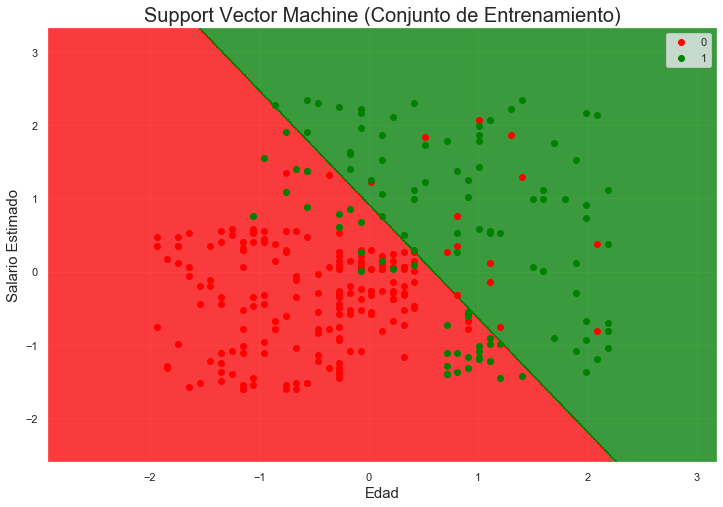

In [16]:
from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_train_scaler, np.ravel (y_train)
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(12,8))
plt.contourf(X1, X2, SCV_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Conjunto de Entrenamiento)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

**Para probar:**
1. Modifica el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el mismo y su performance. Por ejemplo, prueba con con los siguientes kernels: `rbf`, `poly` y `sigmoid`.
2. ¿Cuál es la función del parámetro `Gamma`?
3. Repite el ejercicio 1, modificando los valores de `Gamma`
4. Modifica el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 

__*clase sklearn.svm.SVC*__ ( * , C = 1.0 , kernel = 'rbf' , grado = 3 , gamma = 'escala' , coef0 = 0.0 , contracción = Verdadero , probabilidad = Falso , tol = 0.001 , cache_size = 200 , class_weight = Ninguno , detallado = False , max_iter = -1 , decision_function_shape = 'ovr' , break_ties = False , random_state = Ninguno )

__C:__ Parámetro de **regularización**. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positiva. La penalización es una penalización de l2 al cuadrado.  
A mayor C, mayor sobreajuste. La distancia en la que se ubican los vectores de soporte se hace más pequeña.

__Kernel:__ Especifica el tipo de núcleo que se utilizará en el algoritmo. Debe ser uno de 'lineal', 'poli', 'rbf', 'sigmoide', 'precalculado' o un invocable. Si no se proporciona ninguno, se usará 'rbf'. Si se proporciona un invocable, se usa para calcular previamente la matriz del núcleo a partir de las matrices de datos; esa matriz debería ser una matriz de formas .(n_samples, n_samples)

__Gamma:__ Coeficiente de kernel para 'rbf', 'poly' y 'sigmoid'.
* si `gamma='scale'` se pasa (predeterminado), entonces usa 1 / (n_features * X.var ()) como valor de gamma,
* si `'auto'`, usa 1 / n_features.

**Challenge: Parámetro Gamma en SVM**  

Un menor Gamma implica una mayor distancia entre las observaciones que separan los subespacios del SVM luego la estimación es más conservadora, sin embargo un mayor parámetro “fastidia” a la función Kernel.  

“Hard-SVM” es la regla de aprendizaje que separa un hiperplano con el margen más amplio posible, por lo que puede verse como un problema de optimización cuadrática, en la que el hiperplano de margen máximo es la solución. Sin embargo, asumir que el conjunto es separable por una línea es un supuesto muy fuerte. Pero cuando existe el hiperplano esto nos proporciona un posible separador.

“Soft-SVM” a diferencia del hard, que asume el conjunto de entrenamiento es linealmente separable, esta variación asume que el conjunto de entrenamiento no es linealmente separable y permite que algunas observaciones “crucen” la restricción

## 2. Manos a la obra: Kernel + SVM

En base a todo lo visto en anteriormente, vamos a aplicar SVM al dataset `DS_Clase_04_iris.csv` ¿Cuantas clases tiene este dataset? ¿Es un problema multiclase? 

**Para investigar:** ¿Qué función cumple el parámetro `decision_function_shape` de la función SVC de scikit-learn?

**Ejercicios:**

1. Implementa 3 clasificadores SVM con Kernels: `Polinómico`, `Gaussiano` y `Sigmoide`
2. Realiza la matriz de confusión y el reporte de clasificación para cada kernel.
3. ¿Qué Kernel produce los mejores resultados?


`Tip:` Utilizando el código visto al comienzo de la notebook, podés crear funciones que te permitan graficar la matriz de confusión y los límites de clasificación, sin tener que copiar y pegar todo el código.

__decision_function_shape:__ Si se debe devolver una función de decisión one-vs-rest ('ovr') de shape (n_samples, n_classes) como todos los demás clasificadores, o la función de decisión original one-vs-one ('ovo') de libsvm que tiene shape (n_samples , n_classes * (n_classes - 1) / 2). Sin embargo, uno contra uno ('ovo') siempre **se usa como estrategia de varias clases**. El parámetro se ignora para la clasificación binaria.

In [17]:
data_iris = pd.read_csv('Data\DS_Bitácora_04_Iris.csv')

In [18]:
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* El Dataset tiene 4 clases, por lo que se trata de un problema Multiclase. 

In [20]:
X = data_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data_iris['Species']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [23]:
SCV_model_poly = SVC(kernel='poly', random_state=0)
SCV_model_poly.fit(X_train_scaler, np.ravel (y_train))
y_pred_test_poly = SCV_model_poly.predict(X_test_scaler)

In [24]:
cm_poly = confusion_matrix(y_test,y_pred_test_poly)
print("Matriz de confusión:")
print(cm_poly)

Matriz de confusión:
[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


In [25]:
report_poly = classification_report(y_test, y_pred_test_poly)
print("Reporte de Clasificación:")
print(report_poly)

Reporte de Clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



In [26]:
SCV_model_rbf = SVC(kernel='rbf', random_state=0)

In [27]:
SCV_model_rbf.fit(X_train_scaler, np.ravel (y_train))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
y_pred_test_rbf = SCV_model_rbf.predict(X_test_scaler)

In [29]:
cm_rbf = confusion_matrix(y_test,y_pred_test_rbf)
print("Matriz de confusión:")
print(cm_rbf)

Matriz de confusión:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [30]:
report_rbf = classification_report(y_test, y_pred_test_rbf)
print("Reporte de Clasificación:")
print(report_rbf)

Reporte de Clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [31]:
SCV_model_sigmoid = SVC(kernel='sigmoid', random_state=0)
SCV_model_sigmoid.fit(X_train_scaler, np.ravel (y_train))
y_pred_test_sigmoid = SCV_model_sigmoid.predict(X_test_scaler)

In [32]:
cm_sigmoid = confusion_matrix(y_test,y_pred_test_sigmoid)
print("Matriz de confusión:")
print(cm_sigmoid)

Matriz de confusión:
[[15  0  0]
 [ 0  6  5]
 [ 0  1 11]]


In [33]:
report_sigmoid = classification_report(y_test, y_pred_test_sigmoid)
print("Reporte de Clasificación:")
print(report_sigmoid)

Reporte de Clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.86      0.55      0.67        11
 Iris-virginica       0.69      0.92      0.79        12

       accuracy                           0.84        38
      macro avg       0.85      0.82      0.82        38
   weighted avg       0.86      0.84      0.84        38



* El kernel que produjo los mejores resultados, fue el rbf (Gaussiano)